<a href="https://colab.research.google.com/github/4dh/marathonregression/blob/master/dmh_boston2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Packages Import

In [ ]:
#bees? 
#initial statements for numpy and pandas packages
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
import statsmodels.graphics.api as smg
import random
from sklearn.utils import shuffle

# Reading in Data File

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving marathon_results_2017_best_2.csv to marathon_results_2017_best_2.csv


In [ ]:
#boston_data = pd.read_csv(r'C:\\Users\\dheym\\OneDrive\\Documents\\WilliamMary19-20\\LinearRegression\\marathon_results_2017.csv\\marathon_results_2017.csv')
boston_data= pd.read_csv('marathon_results_2017_best_2.csv')
#boston_data.head(100)

In [ ]:
#Creation of dataframe only incorporating the variables that I am using in my model
boston_data_s = boston_data.loc[:,['Bib','M/F', 'Age', 'X2, 5K Pace', 'X3, Half Pace', 'Y, Official Time']]


#1 for Female and 0 for Male
boston_data_s['X4, Gender'] = np.where(boston_data_s['M/F']=='F', 1, 0)
# don't need this- if female X4 = 0, then it is a male
#boston_data_s['X5, Male'] = np.where(boston_data_s['M/F']=='M', 1, 0)
boston_data_s['X5, Wave: Elite'] = np.where(boston_data_s['Bib']<=100, 1, 0) 
boston_data_s['X6, Wave: One'] = np.where(((boston_data_s['Bib']<=7700) & (boston_data_s['Bib']>=100)) == True, 1, 0)
boston_data_s['X7, Wave: Two'] = np.where(((boston_data_s['Bib']<=15600) & (boston_data_s['Bib'] >= 8000)) == True, 1, 0)
#boston_data_s['X8, Wave: Three'] = np.where(((boston_data_s['Bib']<=23600) & (boston_data_s['Bib'] >= 16000)) == True, 1, 0)
# don't need this - case when all other indicator variables = 0
#boston_data_s['X10, Wave: Four'] = np.where(((boston_data_s['Bib']<=32500) & (boston_data_s['Bib'] >= 24000)) == True, 1, 0)

#cleaning data types

#Note: Now, 'Bib' and 'M/F' are not needed as waves take on indicator variables and gender also takes on indicator variable
boston_data_s.rename(columns={'Age': 'X1, Age'}, inplace=True)

#boston_data_s.sample(10)


# Data Cleaning and Sample Selection

In [ ]:
#Splitting Data into training and test data before creation of model
#set seed in random_state argument so that we consistently choose to start at this seed every time 
#this code is run so that that training data for model building will be consistent

#get subsets of females, males; shuffle; split into two; bind set F1 and M1 as training and F2 and M2 as validation
boston_F = boston_data_s[boston_data_s['X4, Gender']== 1]
boston_Fs = shuffle(boston_F, random_state = 3)


#There are 8560 females, so split into 2 groups of 4280
boston_Fa = boston_Fs.iloc[0:4280,: ]
boston_Fb = boston_Fs.iloc[4280:8560,: ]

boston_M = boston_data_s[boston_data_s['X4, Gender']== 0]
boston_Ms = shuffle(boston_M, random_state = 4)

#There are 11365 males, so split into 2 groups of 5682 and 5683
boston_Ma = boston_Ms.iloc[0:5682,: ]
boston_Mb = boston_Ms.iloc[5682:11365,: ]

#Now we merge females "a" and males "a" for dataset "a" (for training) and merge
#females "b" and males "b" for dataset "b" (validation)
boston_data_A = pd.concat([boston_Fa, boston_Ma])
boston_data_B = pd.concat([boston_Fb, boston_Mb])
#Now sort the two datasets by Y, official time
boston_data_A = boston_data_A.sort_values(by=['Y, Official Time'])
boston_data_A.dropna
boston_data_B = boston_data_B.sort_values(by=['Y, Official Time'])
boston_data_B.dropna
#boston_data_B.head(20)

<bound method DataFrame.dropna of          Bib M/F  X1, Age  ... X5, Wave: Elite X6, Wave: One  X7, Wave: Two
11        11   M       24  ...               1             0              0
28        23   M       25  ...               1             0              0
24        21   M       32  ...               1             0              0
74        63   M       33  ...               1             0              0
21        18   M       27  ...               1             0              0
...      ...  ..      ...  ...             ...           ...            ...
5919    6893   M       58  ...               0             1              0
8831   10603   M       45  ...               0             0              1
3933    4631   M       33  ...               0             1              0
13157  15536   M       69  ...               0             0              1
13167  15547   M       68  ...               0             0              1

[9963 rows x 10 columns]>

In [ ]:
#Splitting Data into training and test data before creation of model
#set seed to 30 in random_state argument so that we consistently choose to start at this seed every time 
#this code is run so that that training data for model building will be consistent

#boston_data_A.drop('Bib', axis = 1)
col_set = ['X1, Age', 'X2, 5K Pace', 'X3, Half Pace', 'X4, Gender', 'X5, Wave: Elite', 'X6, Wave: One', 'X7, Wave: Two']
for i in range(len(col_set)):
  indexNames = 0
  indexNames = boston_data_A[boston_data_A[col_set[i]] == '#VALUE!' ].index
  if len(indexNames>0):
    # Delete these row indexes from dataFrame  
    boston_data_A.drop(indexNames , inplace=True)

#Do for B as well
for i in range(len(col_set)):
  indexNames = 0
  indexNames = boston_data_B[boston_data_B[col_set[i]] == '#VALUE!' ].index
  if len(indexNames>0):
    # Delete these row indexes from dataFrame  
    boston_data_B.drop(indexNames , inplace=True)

#more data cleaning 
boston_data_A['X2, 5K Pace'] = pd.to_numeric(boston_data_A['X2, 5K Pace'])
boston_data_A['X3, Half Pace'] = pd.to_numeric(boston_data_A['X3, Half Pace'])
boston_data_A['Index'] = list(range(len(boston_data_A)))

boston_data_B['X2, 5K Pace'] = pd.to_numeric(boston_data_B['X2, 5K Pace'])
boston_data_B['X3, Half Pace'] = pd.to_numeric(boston_data_B['X3, Half Pace'])
boston_data_B['Index'] = list(range(len(boston_data_B)))


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [ ]:
#Export to CSV
boston_data_A.to_csv('boston_data_A_2.csv')
files.download('boston_data_A_2.csv')
boston_data_B.to_csv('boston_data_B_2.csv')
files.download('boston_data_B_2.csv')

# Data Statistical Summary: Normality of Residuals

In [ ]:
#@title OLS Regression Model starting point{ form-width: "120px" }
#OLS regression
X = boston_data_A[['X1, Age', 'X2, 5K Pace', 'X3, Half Pace', 'X4, Gender', 'X5, Wave: Elite', 'X6, Wave: One', 'X7, Wave: Two']] 
y = boston_data_A['Y, Official Time']
## fit a OLS 
X = sm.add_constant(X)
boston_fit_A = sm.OLS(y, X.astype(float)).fit()

# fitted values (need a constant term for intercept)
boston_fit_A_y = boston_fit_A.fittedvalues
boston_data_A['Yfit'] = boston_fit_A_y

# residuals
boston_fit_A_residuals = boston_fit_A.resid
boston_data_A['Res'] = boston_fit_A_residuals

boston_fit_A.summary()


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Y, Official Time   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     7209.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:52:15   Log-Likelihood:                -39324.
No. Observations:                9947   AIC:                         7.866e+04
Df Residuals:                    9939   BIC:                         7.872e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.1297      1.957      3.643      0.000       3.293      10.966
X1, Age            -0.0940      0.017     -5.425      0.000      -0.128      -0.060
X2, 5K Pace       -20.7778      0.693    -29.977      0.000     -22.137     -19.419
X3, Half Pace      65.9025      0.606    108.804      0.000      64.715      67.090
X4, Gender         -6.6748      0.402    -16.623      0.000      -7.462      -5.888
X5, Wave: Elite    -5.5407      1.959     -2.829      0.005      -9.380      -1.701
X6, Wave: One      -3.2976      0.575     -5.739      0.000      -4.424      -2.171
X7, Wave: Two      -1.0133      0.375     -2.706      0.007      -1.747      -0.279
==============================================================================
Omnibus:                     5591.389   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           169827.631
Skew:                           2.141   Prob(JB):                         0.00
Kurtosis:                      22.784   Cond. No.                         820.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residuals')

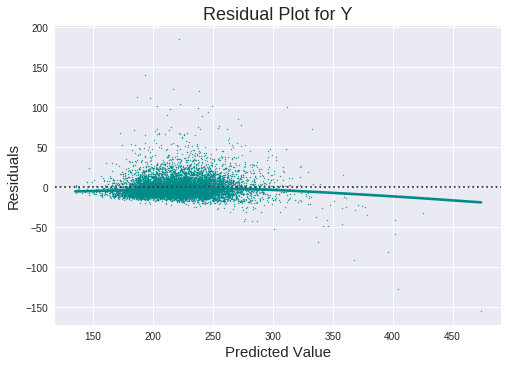

In [ ]:
#@title Residual Plots{ form-width: "120px" }
#residual plot for Y
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
resplot = sns.residplot(boston_data_A['Yfit'], boston_data_A['Res'], lowess=True, color="darkcyan", scatter_kws={'s':2})
resplot.axes.set_title('Residual Plot for Y')
resplot.axes.set_xlabel('Predicted Value')
resplot.axes.set_ylabel('Residuals')

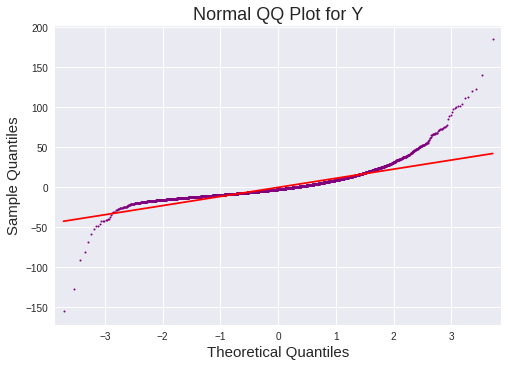

In [ ]:
#Normal QQ plot for Y
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.rc('lines', markersize = 2)
qqplot = sm.qqplot(boston_data_A['Res'], line = 'r',color="purple" )
plt.title('Normal QQ Plot for Y')
plt.show()
#Plot is symmetric with heavy tails

In [ ]:
#OLS regression for Y' = lnY
X = boston_data_A[['X1, Age', 'X2, 5K Pace', 'X3, Half Pace', 'X4, Gender', 'X5, Wave: Elite', 'X6, Wave: One', 'X7, Wave: Two']] 
#new colun for Y' = ln
boston_data_A['lnY, Official Time']= np.log(boston_data_A['Y, Official Time'])
y = boston_data_A['lnY, Official Time']
## fit a OLS 
X = sm.add_constant(X)
boston_fit_B_lnY = sm.OLS(y, X.astype(float)).fit()

# fitted values (need a constant term for intercept)
boston_fit_B_lnY_fit = boston_fit_B_lnY.fittedvalues
boston_data_A['lnYfit'] = boston_fit_B_lnY_fit

# residuals
boston_fit_B_lnY_residuals = boston_fit_B_lnY.resid
boston_data_A['Res, lnY'] = boston_fit_B_lnY_residuals

boston_fit_B_lnY.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     lnY, Official Time   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     7349.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:52:41   Log-Likelihood:                 14645.
No. Observations:                9947   AIC:                        -2.927e+04
Df Residuals:                    9939   BIC:                        -2.922e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.4624      0.009    517.939      0.000       4.445       4.479
X1, Age            -0.0003   7.63e-05     -4.148      0.000      -0.000      -0.000
X2, 5K Pace        -0.0785      0.003    -25.711      0.000      -0.084      -0.072
X3, Half Pace       0.2737      0.003    102.631      0.000       0.268       0.279
X4, Gender         -0.0252      0.002    -14.265      0.000      -0.029      -0.022
X5, Wave: Elite    -0.0945      0.009    -10.964      0.000      -0.111      -0.078
X6, Wave: One      -0.0234      0.003     -9.252      0.000      -0.028      -0.018
X7, Wave: Two      -0.0025      0.002     -1.534      0.125      -0.006       0.001
==============================================================================
Omnibus:                     3702.681   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60095.828
Skew:                           1.350   Prob(JB):                         0.00
Kurtosis:                      14.735   Cond. No.                         820.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residuals')

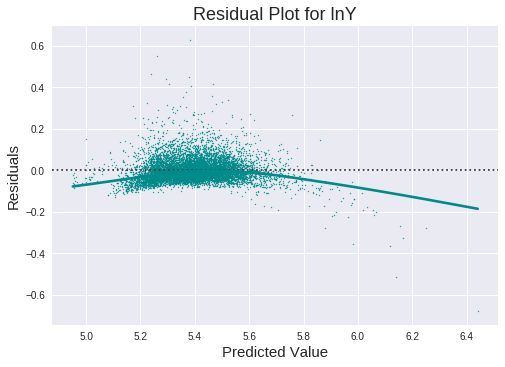

In [ ]:
#residual plot for lnY

plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
resplot = sns.residplot(boston_data_A['lnYfit'], boston_data_A['Res, lnY'], lowess=True, color="darkcyan", scatter_kws={'s':2})
resplot.axes.set_title('Residual Plot for lnY')
resplot.axes.set_xlabel('Predicted Value')
resplot.axes.set_ylabel('Residuals')

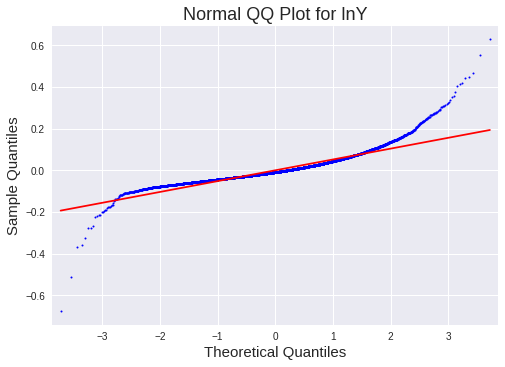

In [ ]:
#Normal QQ plot for lnY
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.rc('lines', markersize = 2)
qqplot2 = sm.qqplot(boston_data_A['Res, lnY'], line = 'r')
plt.title('Normal QQ Plot for lnY')
plt.show()

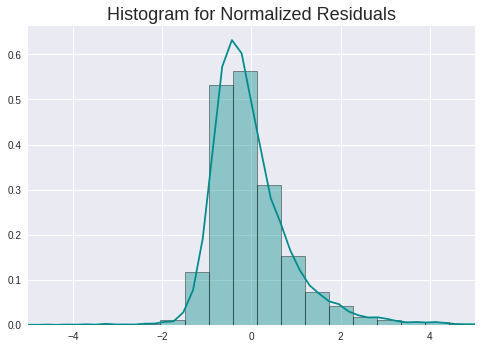

In [ ]:
#Standardized Residuals For Y Histogram
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
stdresidY = boston_fit_A.resid_pearson
sns.distplot(stdresidY, bins = 50, color = "darkcyan", hist_kws=dict(edgecolor="k", linewidth=1))
plt.rcParams["patch.force_edgecolor"] = True
plt.xlim([-5,5])
#plt.autoscale(enable=True, axis='y')
plt.title('Histogram for Normalized Residuals')
plt.show()
#The Histogram of Normalized Residuals reveals a normal distribution. This was using Y prior to the lnY transformation. For the model, I will 
#stick with using Y rather than lnY as there have not been improvements with residual normality after a lnY transformation.

# Preliminary Research


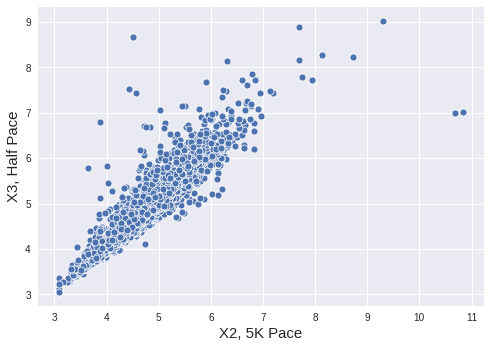

In [ ]:
# Understanding the data
#Scatter Plot of 5k pace vs half marathon pace
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

ax = sns.scatterplot(x = 'X2, 5K Pace', y = 'X3, Half Pace', sizes=(20, 200), palette=cmap, hue_norm=(0, 7), legend="full", data = boston_data_A)

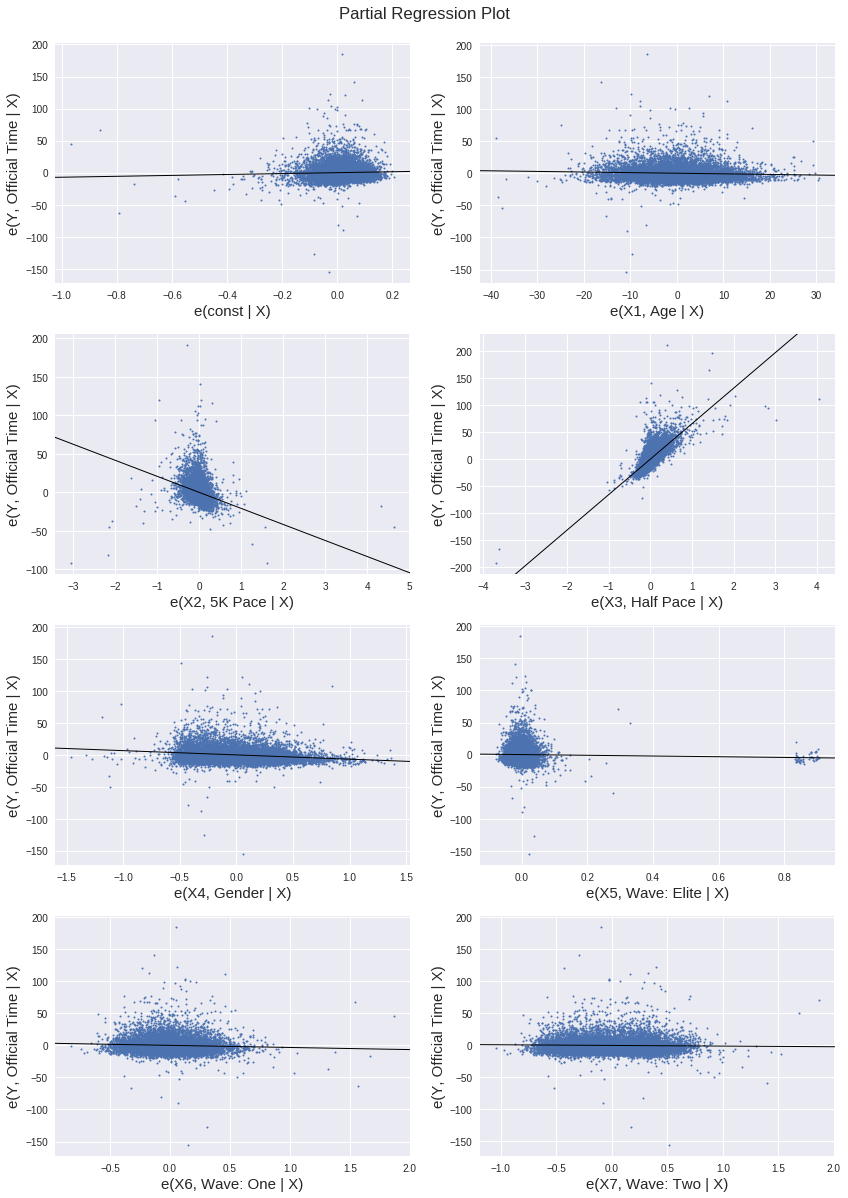

In [ ]:
#Partial Regression Plots
fig = plt.figure(figsize=(12,17))
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
plt.rc('lines', markersize = 2)
plt.rc('lines', linewidth = 1)
plt.rc('lines', color = 'forestgreen')
fig = sm.graphics.plot_partregress_grid( boston_fit_A, fig=fig)
#fig2 = boston_fit_A.plot_coefficients_of_determination(figsize=(8,2))

# Data Statistical Summary: Correlations, Matrix Plots, Scatter Plots

,"Y, Official Time","X1, Age","X2, 5K Pace","X3, Half Pace","X4, Gender","X5, Wave: Elite","X6, Wave: One","X7, Wave: Two"
"Y, Official Time",1.000000,0.392144,0.795812,0.900618,0.286281,-0.153645,-0.543167,0.058643
"X1, Age",0.392144,1.000000,0.437449,0.426468,-0.244600,-0.072368,-0.350131,0.022573
"X2, 5K Pace",0.795812,0.437449,1.000000,0.936738,0.425233,-0.172690,-0.664939,0.065293
"X3, Half Pace",0.900618,0.426468,0.936738,1.000000,0.407014,-0.165642,-0.639257,0.061193
"X4, Gender",0.286281,-0.244600,0.425233,0.407014,1.000000,0.001115,-0.506698,0.037830
"X5, Wave: Elite",-0.153645,-0.072368,-0.172690,-0.165642,0.001115,1.000000,-0.048643,-0.049031
"X6, Wave: One",-0.543167,-0.350131,-0.664939,-0.639257,-0.506698,-0.048643,1.000000,-0.491858
"X7, Wave: Two",0.058643,0.022573,0.065293,0.061193,0.037830,-0.049031,-0.491858,1.000000


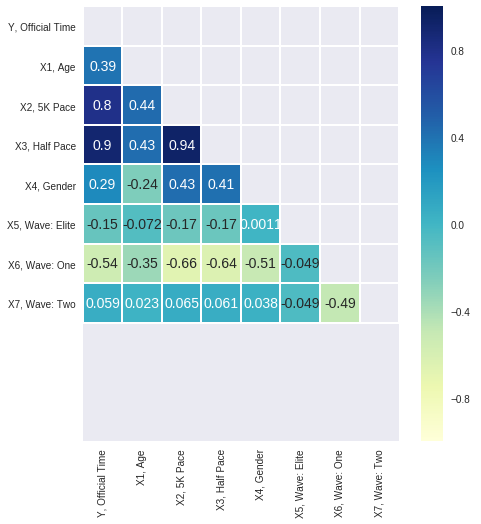

In [ ]:
#@title Correlation Matrix Heatmap{ form-width: "120px" }
boston_select_A = boston_data_A.loc[:,['Y, Official Time','X1, Age', 'X2, 5K Pace', 'X3, Half Pace', 'X4, Gender', 'X5, Wave: Elite', 'X6, Wave: One', 'X7, Wave: Two']]
corrMatrix = boston_select_A.corr()
display(corrMatrix)

mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(8,8))


with sns.axes_style("white"):
  sns.heatmap(corrMatrix, mask=mask, square= True,  annot=True, cmap='YlGnBu',  vmin=-1, vmax=1, linewidths=1)
  ax.set_ylim(11, 0)


In [ ]:
#@title Pairwise { form-width: "120px" }
display(boston_select_A.describe(include='all'))
#d.summary(stats='basic', columns='all', orientation='auto')

,"Y, Official Time","X1, Age","X2, 5K Pace","X3, Half Pace","X4, Gender","X5, Wave: Elite","X6, Wave: One","X7, Wave: Two"
count,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000
mean,222.584228,42.521665,4.791219,4.905936,0.429577,0.004826,0.327938,0.331457
std,31.086577,10.625899,0.553488,0.599622,0.495041,0.069302,0.469486,0.470760
min,129.970000,18.000000,3.080000,3.061030,0.000000,0.000000,0.000000,0.000000
25%,201.450000,35.000000,4.384000,4.476840,0.000000,0.000000,0.000000,0.000000
50%,221.400000,43.000000,4.816000,4.909590,0.000000,0.000000,0.000000,0.000000
75%,239.750000,50.000000,5.166000,5.282620,1.000000,0.000000,1.000000,1.000000
max,412.170000,80.000000,10.846000,9.017660,1.000000,1.000000,1.000000,1.000000


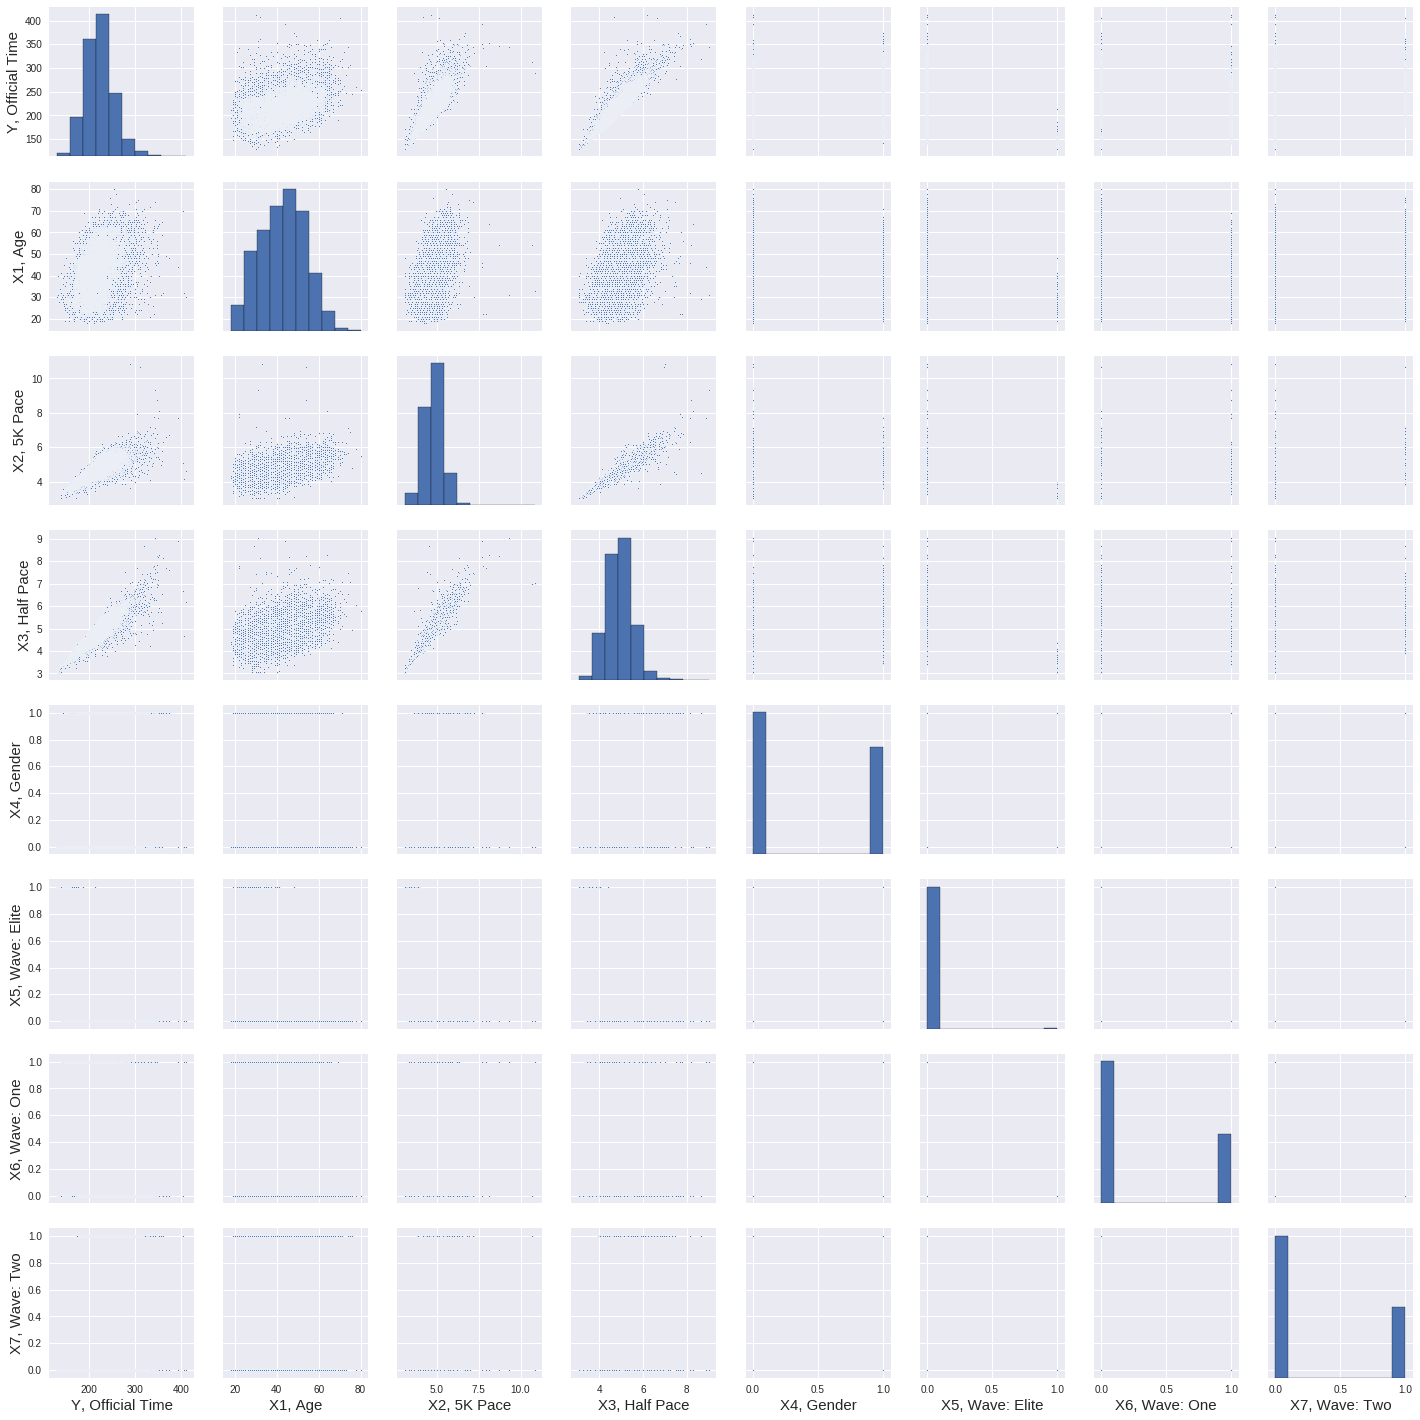

In [ ]:
#@title Pairwise scatter plots for checking multicollinearity{ form-width: "120px" }
sns.pairplot(boston_select_A, height = 2.5)


Text(0.5, 1, 'Impact of Gender on Pace')

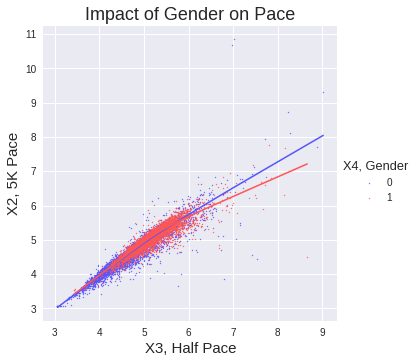

In [ ]:
#I'd like to investigate the negative coefficient for X4, Gender
sns.lmplot(y='X2, 5K Pace', x='X3, Half Pace',
           hue='X4, Gender', data=boston_select_A, lowess = True, palette = 'seismic',  scatter_kws={'s':2})
plt.title('Impact of Gender on Pace')

# Remedial Measures

In [ ]:
#influence & outliers

#INFLUENCE OLS Influence results
b_influences = boston_fit_A.get_influence()

display(b_influences.summary_table)
#as_csv(b_influences)

# normalized residuals ri
b_norm_residuals = boston_fit_A.get_influence().resid_studentized_internal

# absolute residuals
b_abs_resid = np.abs(boston_fit_A_residuals)
boston_data_A['ABS RES'] = b_abs_resid

# leverage, from statsmodels internals
b_leverage = boston_fit_A.get_influence().hat_matrix_diag
boston_data_A['hii'] = b_leverage

########################################
# dfbetas, from statsmodels internals

#edudata['dfbetas'] = edu_dfbeta

# cook's distance, from statsmodels internals
b_cooks = boston_fit_A.get_influence().cooks_distance[0]
boston_data_A['Cooks distance'] = b_cooks
#boston_data_A.head(10)



<bound method OLSInfluence.summary_table of <statsmodels.stats.outliers_influence.OLSInfluence object at 0x7f34f2d82160>>

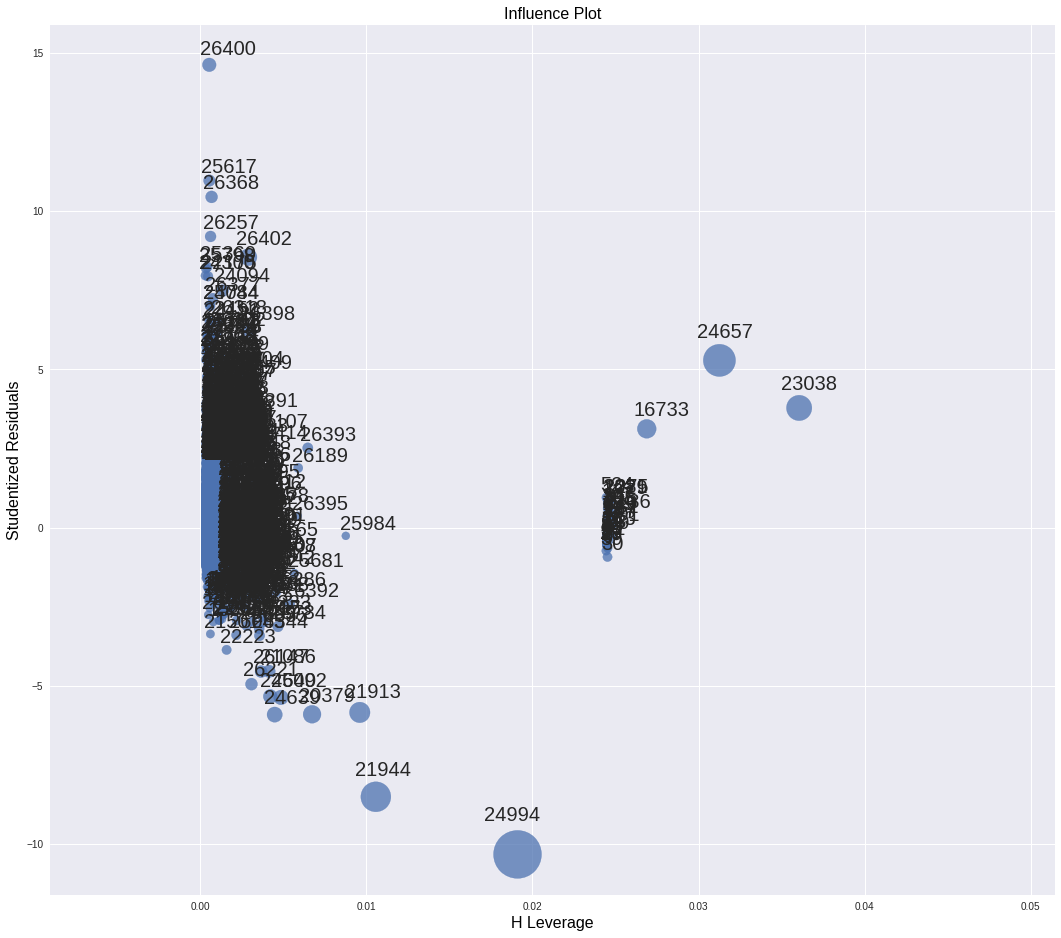

In [ ]:
#influence plot
fig3, ax = plt.subplots(figsize=(18,16))
fig3 = sm.graphics.influence_plot(boston_fit_A, ax=ax)

Text(0, 0.5, 'Absolute Residuals')

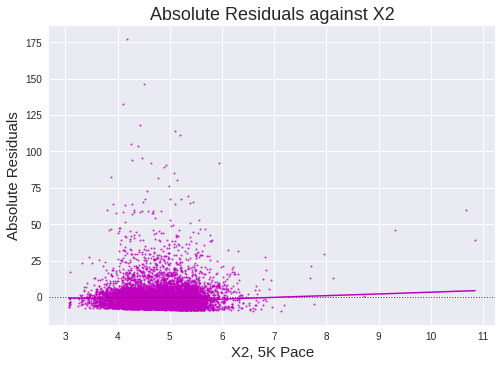

In [ ]:
#residuals against X2

resplotvx4 = sns.residplot(boston_data_A['X2, 5K Pace'], boston_data_A['ABS RES'], lowess=True, color="m")
resplotvx4.axes.set_title('Absolute Residuals against X2')
resplotvx4.axes.set_xlabel('X2, 5K Pace')
resplotvx4.axes.set_ylabel('Absolute Residuals')

Text(0, 0.5, 'Absolute Residuals')

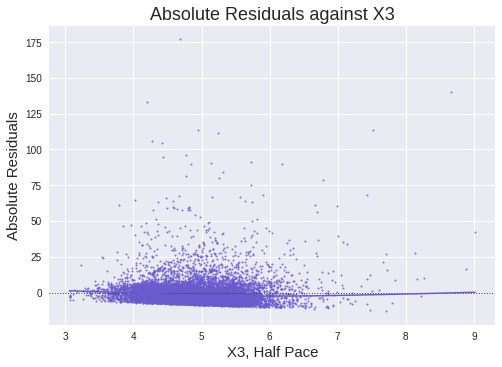

In [ ]:
#residuals against X3

resplotvx4 = sns.residplot(boston_data_A['X3, Half Pace'], boston_data_A['ABS RES'], lowess=True, color="slateblue")
resplotvx4.axes.set_title('Absolute Residuals against X3')
resplotvx4.axes.set_xlabel('X3, Half Pace')
resplotvx4.axes.set_ylabel('Absolute Residuals')

In [ ]:
#weighted least squares
